## KMeans Algorithm
In this notebook we will explore sklearn's Kmeans clustering algorithm implementation.
We will take a simple 2D data, so that it can be easier to plot and visualize the clusters formed

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1, 0.6], [9,11]])
X.shape

(6, 2)

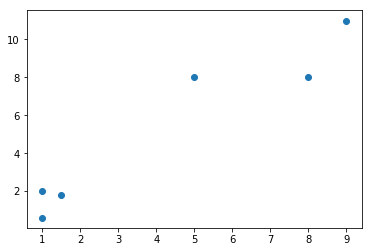

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means = KMeans(n_clusters=2) # Default = 8

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
# To see which point went to which cluster
k_means.labels_

array([1, 1, 0, 0, 1, 0])

In [8]:
k_means.cluster_centers_

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

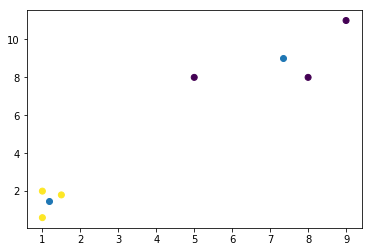

In [9]:
# Plotting
plt.scatter(X[:, 0], X[:,1], c=k_means.labels_) # Plotting points and giving colours according to clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1]) # Plotting means
plt.show()

In [10]:
# Creating clusters in Iris dataset
from sklearn import datasets

In [12]:
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target

In [13]:
# Wont plot since not 2d
k_means2 = KMeans(n_clusters=3)

In [14]:
k_means2.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
k_means2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [16]:
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Checking accuracy
correct = sum(k_means2.labels_ == Y_iris)
correct

134

In [18]:
print('Clustering accuracy is: ', correct / Y_iris.shape[0])

Clustering accuracy is:  0.8933333333333333


## Self Implementation of KMeans Clustering

_Caution: This is a very very simple implementation of Kmeans algorithm , we simply take first K data pts as initial means,
there is a chance that the algorithm might no be efficient enough every time to separate the data pts properly into clusters_

In [19]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        # We will maintain the following things
        # 1. A list of means at all times
        # 2. A list of what points belong to what cluster, as we will need to recalculate distances from mean for all
        # pts of a cluster after each iteration
        self.means = []
        # Randomly initilaize - pick first K (n_clusters) data pts
        for i in range(self.k):
            self.means.append(data[i])

        # Iterate max_iter times
        for i in range(self.max_iter):
            # Assign data points to the cluster they belong to
            # Create empty clusters, forget about old clusters
            # Simply assign clusters to data pts corresponding to the mean values that are updated
            clusters = []
            # K empty clusters
            for j in range(self.k):
                clusters.append([])
            # Go through each data point and assign to that cluster with lowest distance from it
            for point in data:
                # distance to all mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # minimum distance
                min_distance = min(distances)
                # get mean with which distance is minimum say L
                L = distances.index(min_distance)
                # add point to cluster L
                clusters[L].append(point)

            # Calculate new mean values
            # Go through all clusters and calculate mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0) # Mean
                # Check for change 
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                # Update
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self, test_data):
        # Simply add to cluster from whose mean test data pt is least farther
        predictions = []
        for point in test_data:
            distances = [((point - m)**2).sum() for m in self.means]
            # minimum distance
            min_distance = min(distances)
            # get mean with which distance is minimum say L
            L = distances.index(min_distance)
            # add point to cluster L
            predictions.append(L)
        return predictions

In [20]:
k_means = K_Means(k=2, max_iter=10)

constructor


In [25]:
k_means.fit(X)

In [26]:
k_means.predict(X)

[0, 0, 1, 1, 0, 1]

In [27]:
k_means.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

#### Todo - Look to implement the sillouhete algorithm for best K value
s(i) = b(i) - a(i) / max(b(i), a(i))

b(i) = avg distance of ith data pt from neighbouring cluster (cluster from which avg distance is min is neighboring)
a(i) = avg distance of ith data pt from  pts in cluster to which it belongs

-1 <= S(i) <= 1

We want the answer to be closer to 1.